# Уменьшение размерности

In [1]:
import pandas as pd
import umap
import umap.plot

In [2]:
data_headers = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
data = pd.read_csv('glass.data', names=data_headers)


In [3]:
data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
y = data.iloc[:,-1]

In [5]:
labels = ["building_windows_float_processed",
          "building_windows_non_float_processed",
          "vehicle_windows_float_processed",
          "vehicle_windows_non_float_processed",
          "containers",
          "tableware",
          "headlamps"]

In [6]:
embedding = umap.UMAP(n_neighbors=5).fit(data)

<AxesSubplot:>

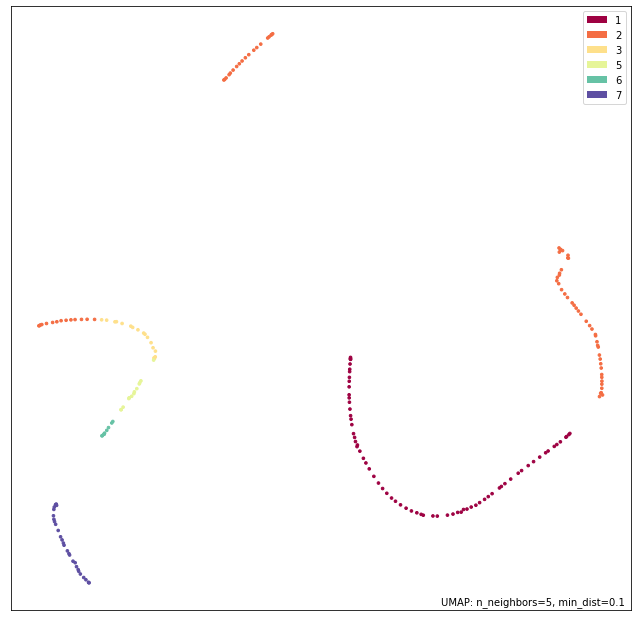

In [7]:
umap.plot.points(embedding, labels=data.iloc[:,-1])

In [8]:
from sklearn.manifold import TSNE
import seaborn as sns

In [9]:
embedding_tsne = TSNE(init='random', perplexity=5).fit_transform(data)

d:\документы\учеба\мага\1 семестр\демидова\3_4\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [10]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = embedding_tsne[:,0]
df["comp-2"] = embedding_tsne[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

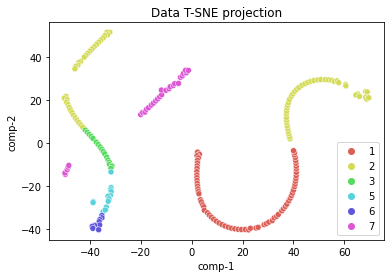

In [14]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df).set(title="Data T-SNE projection") 

In [15]:
embedding_UMAP = umap.UMAP(n_neighbors=5).fit_transform(data)

[Text(0.5, 1.0, 'Data UMAP projection')]

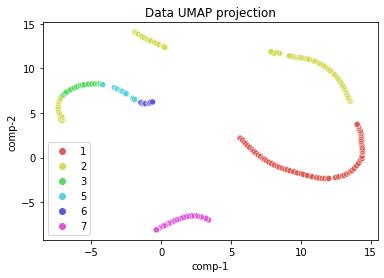

In [16]:
df2 = pd.DataFrame()
df2["y"] = y
df2["comp-1"] = embedding_UMAP[:,0]
df2["comp-2"] = embedding_UMAP[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df2.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df2).set(title="Data UMAP projection") 

# Скалеры

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

In [23]:
data = pd.DataFrame()
data['comp-1'] = df['comp-1']
data['comp-2'] = df['comp-2']

In [24]:
minmax_scaler = MinMaxScaler()
minmax_data = minmax_scaler.fit_transform(data)
minmax_df = pd.DataFrame(minmax_data, columns =['comp-1', 'comp-2'])

In [25]:
standard_scaler = StandardScaler()
standard_data = standard_scaler.fit_transform(data)
standard_df = pd.DataFrame(standard_data, columns =['comp-1', 'comp-2'])

In [26]:
robust_scaler = RobustScaler()
robust_data = robust_scaler.fit_transform(data)
robust_df = pd.DataFrame(robust_data, columns =['comp-1', 'comp-2'])

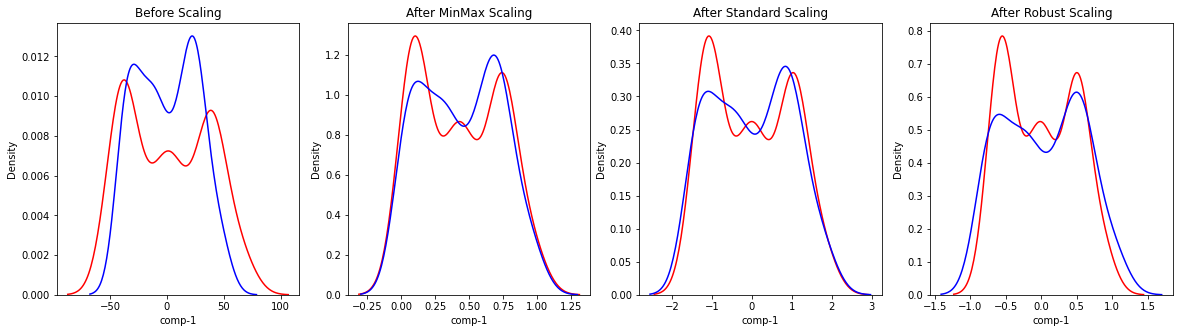

In [32]:
ig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(data['comp-1'], ax = ax1, color ='r')
sns.kdeplot(data['comp-2'], ax = ax1, color ='b')

ax2.set_title('After MinMax Scaling')
sns.kdeplot(minmax_df['comp-1'], ax = ax2, color ='r')
sns.kdeplot(minmax_df['comp-2'], ax = ax2, color ='b')

ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df['comp-1'], ax = ax3, color ='r')
sns.kdeplot(standard_df['comp-2'], ax = ax3, color ='b')

ax4.set_title('After Robust Scaling')
sns.kdeplot(robust_df['comp-1'], ax = ax4, color ='r')
sns.kdeplot(robust_df['comp-2'], ax = ax4, color ='b')

plt.show()